In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Required for loading dataset
import numpy as np
from keras.utils import to_categorical
import csv
import cv2 as cv
from sklearn.model_selection import train_test_split

#Required for loading model and setting up backend
from keras.models import Model, Sequential
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

#Required for input and preprocessing images
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import matplotlib.pyplot as plt
%matplotlib inline

Load Trained Model

In [5]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/GTSR/Copy of Sakshee_GTSRB_classification.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        3

In [6]:
model.input_spec

InputSpec(min_ndim=4, axes={-1: 3})

In [7]:
print(len(model.layers))

15


# Load Data

In [8]:
X_data = []
Y_data = []

with open('/content/drive/MyDrive/GTSR/training_data/1images_color.csv', 'r') as f:
  reader = csv.reader(f)
  for row in reader:
    if row[0]!='':
      label = row[0]
      image = np.array([int(a) for a in row[1:]], dtype='uint8')
      image = image.reshape((32, 32, 3))
#      image = cv.resize(image,(64, 64))
      X_data.append(image)
      Y_data.append(label)

X_train, X_, Y_train, Y_ = train_test_split(X_data, Y_data, train_size=39000)
X_data = np.array(X_data)
Y_data = np.array(Y_data)
X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_train_non_categorical= Y_train
Y_train = to_categorical(Y_train)

print(X_train.shape, X_data.shape)
print(Y_train.shape, Y_data.shape, Y_train_non_categorical.shape)

(39000, 32, 32, 3) (39209, 32, 32, 3)
(39000, 43) (39209,) (39000,)


# Input and display images

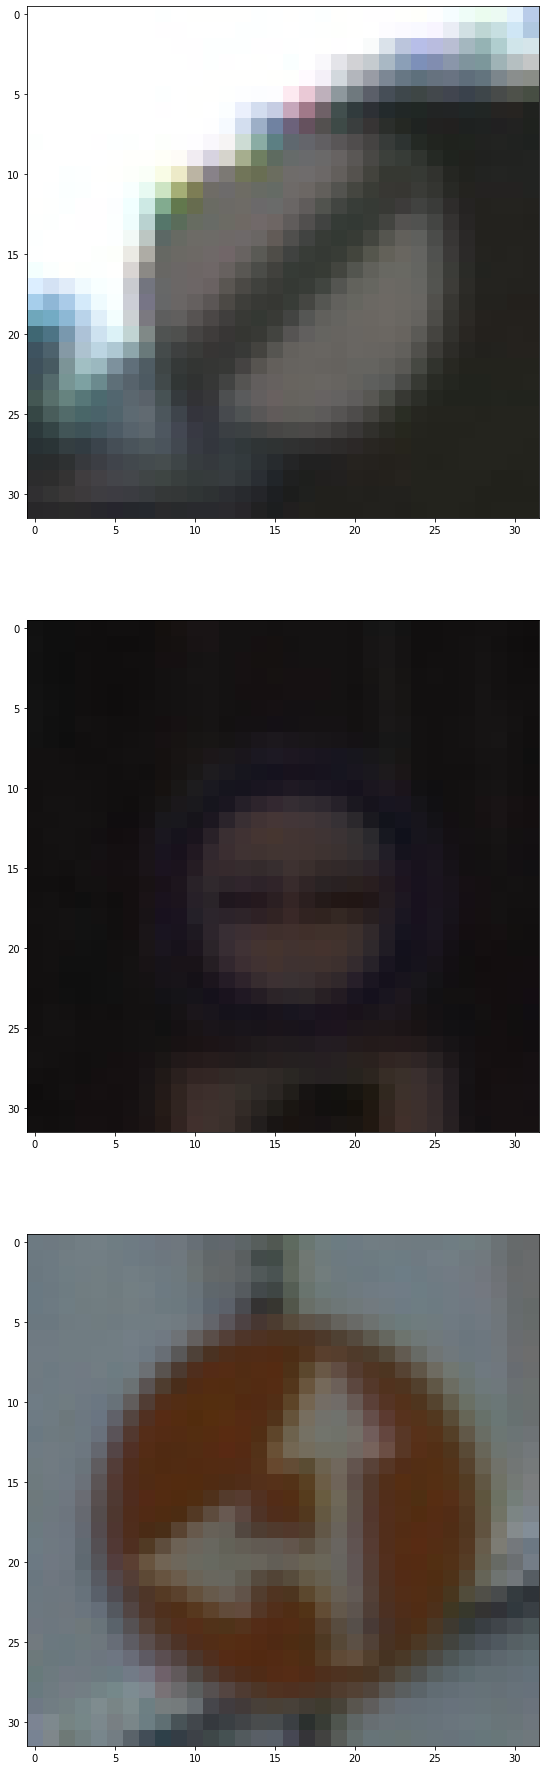

In [25]:
input_data ={
    "images_directory" : '/content/drive/MyDrive/GTSR/training_data/1/',
    "images" : "Copy of 00008_00022.jpg",   #input can be a list too
    "target_size" : (32,32),
}
def input_images(input_data):
  images_directory = input_data["images_directory"]
  images = input_data["images"]
  target_size = input_data["target_size"]


  multi_output = True           #if "images" is a list
  if type(images) != list:      #if input is not a list, then convert it into singleton list
        multi_output = False
        images = [images]

  to_predict = []
  for i in range(len(images)):
    image_directory = images_directory + images[i]
    image = load_img(image_directory, target_size = target_size)
    image = img_to_array(image)
    to_predict.append(image)
  
  
  nrows = len(to_predict)
  ncols = 1
  fig, ax = plt.subplots(nrows, ncols, figsize=(32,32))
  for i in range(nrows):
    ax[i].imshow(to_predict[i])

"""
to_predict = np.array([X_[1], X_[6], X_[8]])
fig, ax = plt.subplots(3, 1, figsize = (32,32)) #, figsize=(20, 10)
ax[0].imshow(to_predict[0]/255.)
ax[1].imshow(to_predict[1]/255.)
#ax[1].imshow(cv.resize(to_predict[0]/255,(64, 64)))
ax[2].imshow(to_predict[2]/255.)
"""

In [ ]:
def make_predictions():
  predictions = model.predict(to_predict.copy())
  predicted_labels = [pred for pred in np.argmax(predictions, axis=1)]
  

  return_data = []
  for i in range(len(to_predict)):
    label = prediction_labels[i]
    sign_name = classes[label]
    data = {
        "label" : label,
        "sign_name" : sign_name,
    }
    return_data.append(data)
  return return_data

[17, 13, 38]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


# **Activation Layer Visualization**


* Visualize how a given input comes out of specific activation layers.
* Explores which feature maps are getting activated in the model.



In [ ]:
"""
!pip install tf_explain
from tf_explain.core.activations import ExtractActivations
"""

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


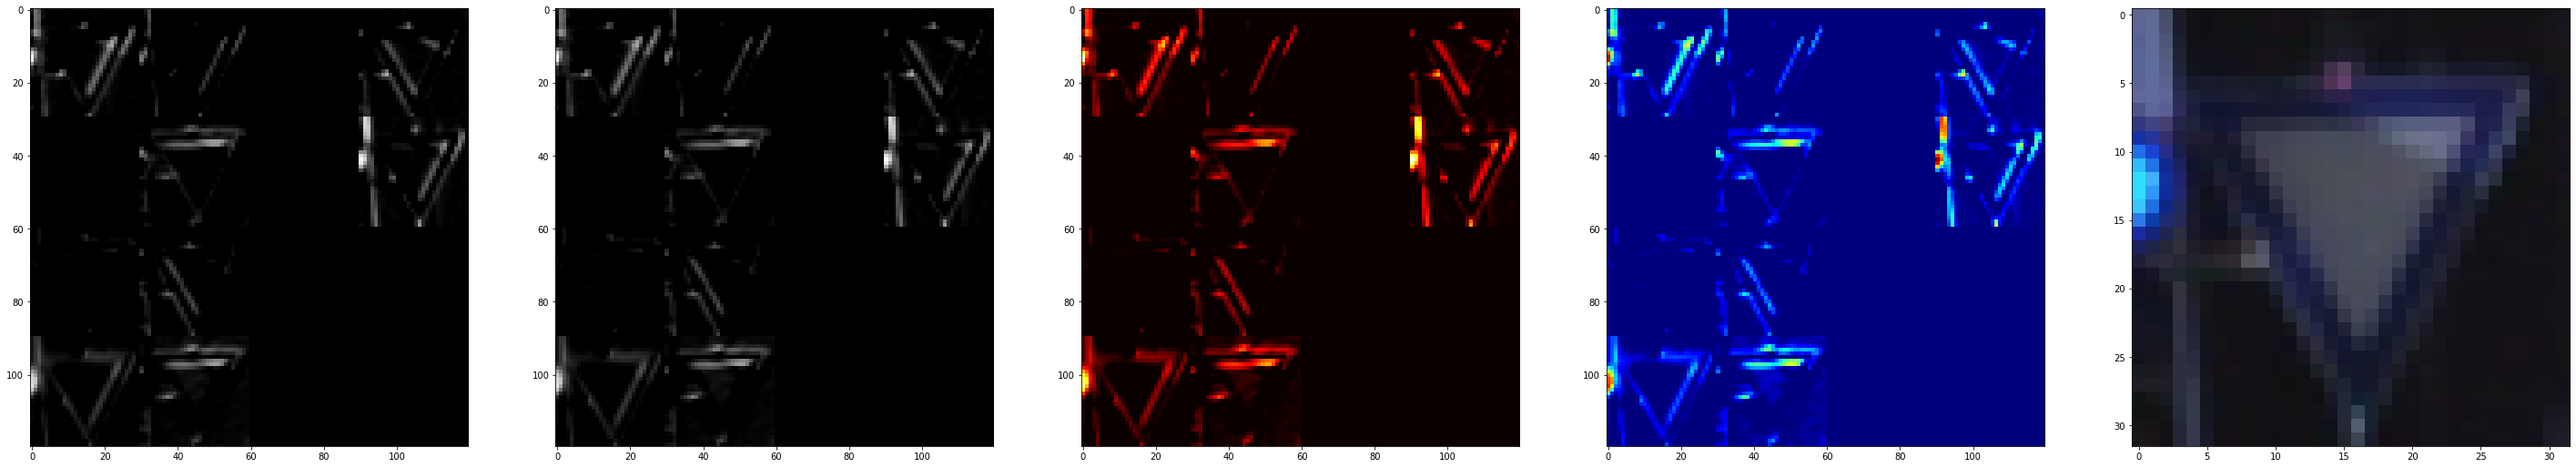

In [ ]:
input_data = {
    "layer_name" : "conv2d",
}
def visualise_activations():
  !pip install tf_explain
  from tf_explain.core.activations import ExtractActivations
  explainer = ExtractActovations()
  layer_name = input_data["layer_name"]
  grid = explainer.explain((to_predict, None), model, [layer_name])
  fig, ax = plt.subplots(1, 1, figsize=(32,32))
  ax[0].imshow(grid, cmap='binary_r')

"""
explainer = ExtractActivations()
grid = explainer.explain((X_[6].reshape(1,32,32,3), None), model, ['conv2d'])
fig, ax = plt.subplots(1,5, figsize=(50, 50))
ax[0].imshow(grid, cmap='gray')
ax[1].imshow(grid, cmap='binary_r')
ax[2].imshow(grid, cmap='hot')
ax[3].imshow(grid, cmap='jet') # cmap='binary_r' cmap='hot'  cmap='jet' cmap='gray'
ax[4].imshow(X_[6])
"""

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


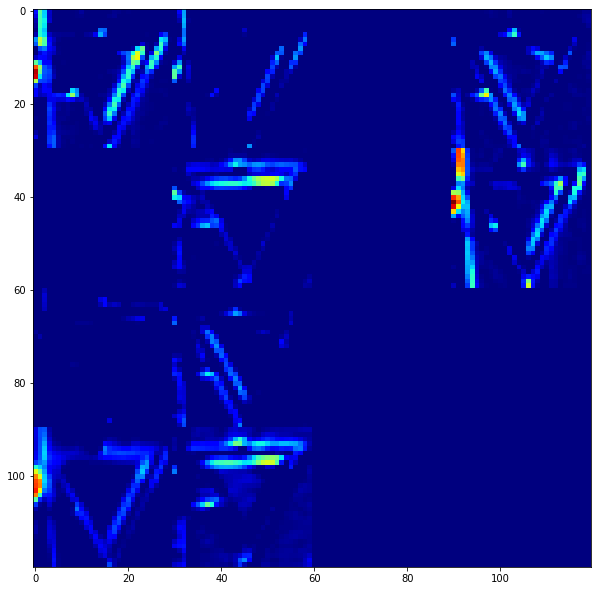

In [ ]:
"""
grid = explainer.explain((X_[6].reshape(1,32,32,3), None), model, ['conv2d'])
fig, ax = plt.subplots(figsize=(10, 20))
ax.imshow(grid, cmap='jet')
"""

# **Occlusion Sensitivity**


* Visualize how parts of the image affect neural net's confidence by hiding parts of the image iteratively.


In [ ]:
from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
explainer2 = OcclusionSensitivity()

/usr/local/lib/python3.7/dist-packages/tf_explain/utils/display.py:112: RuntimeWarning: invalid value encountered in true_divide
  heatmap = (heatmap - np.min(heatmap)) / (heatmap.max() - heatmap.min())


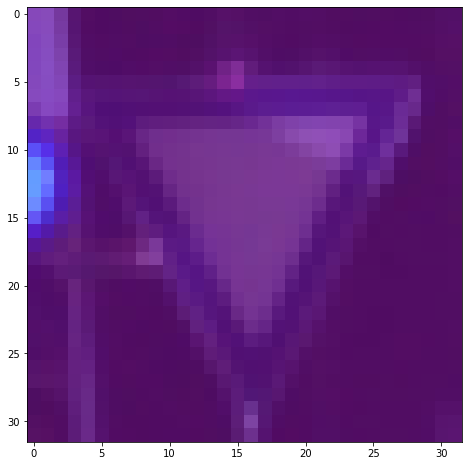

In [ ]:
input_data = {
    "class_label" : 13,
    "patch_size" : 1,
}
def visualise_activations(input_data):
  !pip install tf_explain
  from tf_explain.core.occlusion_sensitivity import OcclusionSensitivity
  explainer = OcclusionSensitivity()
  class_label = input_data["class_label"]
  patch_size = input_data["patch_size"]

  grid = explainer.explain((to_predict, None), model, class_label, patch_size)
  fig, ax = plt.subplots(figsize=(32,32))
  plt.imshow(grid)

"""
grid = explainer2.explain((X_[6].reshape(1,32,32,3), None), model, 13, 1)
fig, ax = plt.subplots(figsize=(8, 8))
plt.imshow(grid)
"""

Further section needs to be fixed

!This method is quite important!

# **GradCAM**

* Visualize how parts of the image affect neural net's output by looking into the gradients backpropagated to the class activation maps.

**tf_explain impementation**

In [ ]:
X_6 = load_img('/content/drive/MyDrive/GTSR/training_data/1/Copy of 00008_00022.jpg', target_size=(32, 32))
img = tf.keras.preprocessing.image.img_to_array(X_6)
#images = np.asarray([np.array(X_6)])

In [ ]:
from tf_explain.core.grad_cam import GradCAM
explainer3 = GradCAM()

In [ ]:
grid1 = explainer3.explain(validation_data=([img], None), model=model, layer_name='conv2d', class_index=36)   #[X_[1].reshape(1, 32, 32, 3)]
grid2 = explainer3.explain((X_[1].reshape(1,32,32,3), None), model, model.layers[0], 14)

fig = plt.figure(figsize = (18, 8))
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(img_inp / 255.)
ax1.imshow(grid1, alpha=0.6)
ax2 = fig.add_subplot(1, 3, 2)
ax2.imshow(img_inp / 255.)
ax2.imshow(grid2, alpha=0.6)
ax3 = fig.add_subplot(1, 3, 3)
ax3.imshow(img_inp / 255.)

ValueError: ignored

...
# **GradCam**
**tf-kers-vis implementation**

In [ ]:
!pip install --upgrade tf-keras-vis tensorflow matplotlib

Requirement already up-to-date: tf-keras-vis in /usr/local/lib/python3.7/dist-packages (0.5.5)
Requirement already up-to-date: tensorflow in /usr/local/lib/python3.7/dist-packages (2.4.1)
Requirement already up-to-date: matplotlib in /usr/local/lib/python3.7/dist-packages (3.3.4)


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img

In [ ]:
def loss(output):
    # 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
    return (output[0][36])

In [ ]:
def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear
    return m

In [ ]:
X_6 = load_img('/content/drive/MyDrive/GTSR/training_data/1/Copy of 00008_00022.jpg', target_size=(32, 32))
images = np.asarray([np.array(X_6)])

In [ ]:
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam

# Create Gradcam object
gradcam = Gradcam(model,
                  model_modifier=model_modifier,
                  clone=False)

# Generate heatmap with GradCAM
cam = gradcam(loss,
              images,
              penultimate_layer=-1, # model.layers number
             )
cam = normalize(cam)

f, ax = plt.subplots(**subplot_args)

heatmap = np.uint8(cm.jet(cam[i])[..., :3] * 255)
ax[0].set_title(title, fontsize=14)
ax[0].imshow(X_[6])
ax[0].imshow(heatmap, cmap='jet', alpha=0.5) # overlay
plt.tight_layout()
plt.show()

AttributeError: ignored